In [1]:
import tensorflow as tf
from tensorflow import keras
import cv2
import numpy as np
import os

In [2]:
IMAGE_SIZE = (100,100)
def load_images():
    image = []
    label = []
    image_path = []
    TRAIN_FOLDER_PATH = "C:/Users/pc/Documents/pythonProjects/OPSI2023/images/train" #"D:/Programming/OPSI/images/train"  #ada sebanyak 3421 image
    TEST_FOLDER_PATH = "C:/Users/pc/Documents/pythonProjects/OPSI2023/images/test" #"D:/Programming/OPSI/images/test"  #ada sebanyak 1871 image, total ada 5292 images
    for folder_name in os.listdir(TRAIN_FOLDER_PATH):
        for filename in os.listdir(os.path.join(TRAIN_FOLDER_PATH,folder_name)):
            print(filename)
            subfolder_path = os.path.join(folder_name,filename)
            img = cv2.imread(os.path.join(TRAIN_FOLDER_PATH,subfolder_path))
            img = cv2.resize(img,IMAGE_SIZE)
            image.append(img)
            label.append(folder_name)
            image_path.append(os.path.join(TRAIN_FOLDER_PATH,subfolder_path))

    for folder_name in os.listdir(TEST_FOLDER_PATH):
        for filename in os.listdir(os.path.join(TEST_FOLDER_PATH,folder_name)):
            print(filename)
            subfolder_path = os.path.join(folder_name,filename)
            img = cv2.imread(os.path.join(TEST_FOLDER_PATH,subfolder_path))
            img = cv2.resize(img,IMAGE_SIZE)
            image.append(img)
            label.append(folder_name)
            image_path.append(os.path.join(TEST_FOLDER_PATH,subfolder_path))
    image = np.array(image)
    return image,label, image_path

In [3]:
image,label, image_path = load_images()

adenocarcinoma_left lower lobe T2 N0 M0 Ib (1).png
adenocarcinoma_left lower lobe T2 N0 M0 Ib (10).png
adenocarcinoma_left lower lobe T2 N0 M0 Ib (100).png
adenocarcinoma_left lower lobe T2 N0 M0 Ib (101).png
adenocarcinoma_left lower lobe T2 N0 M0 Ib (102).png
adenocarcinoma_left lower lobe T2 N0 M0 Ib (103).png
adenocarcinoma_left lower lobe T2 N0 M0 Ib (104).png
adenocarcinoma_left lower lobe T2 N0 M0 Ib (105).png
adenocarcinoma_left lower lobe T2 N0 M0 Ib (106).png
adenocarcinoma_left lower lobe T2 N0 M0 Ib (107).png
adenocarcinoma_left lower lobe T2 N0 M0 Ib (108) - Copy.png
adenocarcinoma_left lower lobe T2 N0 M0 Ib (108).png
adenocarcinoma_left lower lobe T2 N0 M0 Ib (109) - Copy.png
adenocarcinoma_left lower lobe T2 N0 M0 Ib (109).png
adenocarcinoma_left lower lobe T2 N0 M0 Ib (11).png
adenocarcinoma_left lower lobe T2 N0 M0 Ib (110) - Copy.png
adenocarcinoma_left lower lobe T2 N0 M0 Ib (110).png
adenocarcinoma_left lower lobe T2 N0 M0 Ib (111) - Copy.png
adenocarcinoma_left lo

In [4]:
print(len(image)) #banyaknya data gambar untuk train session
print(label)
print(len(label))
image.shape

7871
['Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adeno

(7871, 100, 100, 3)

In [5]:
# i = 5000
# print(label[i])
# cv2.imshow('image',image[i])
# cv2.waitKey(0)

In [6]:
from sklearn.preprocessing import OneHotEncoder
label_encoder = OneHotEncoder()
new_label = np.reshape(label,(-1,1))
new_label = label_encoder.fit_transform(new_label).toarray()

In [7]:
print(new_label)
print(len(new_label [0]))
print(new_label .shape)
# new_label = np.resize(new_label,(5292,10))
print(new_label.shape)
new_label[0]

[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]]
6
(7871, 6)
(7871, 6)


array([1., 0., 0., 0., 0., 0.])

In [8]:
from keras.preprocessing.image import ImageDataGenerator
augmentation = ImageDataGenerator(
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(image,new_label,test_size=0.2,random_state=3)

In [12]:
# model_xception = keras.applications.xception.Xception(weights='imagenet',include_top=False,input_tensor=keras.layers.Input(shape=(100,100,3)))

# for layer in model_xception.layers:
#     layer.trainable = False
# print(model_xception.summary())

In [13]:
# model_lenet5 = keras.Sequential()
# model_lenet5.add(keras.layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=(100,100, 3)))
# model_lenet5.add(keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2))
# model_lenet5.add(keras.layers.Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
# model_lenet5.add(keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2))
# model_lenet5.add(keras.layers.Flatten())

# model_lenet5.add(keras.layers.Dense(units=120, activation='relu'))
# model_lenet5.add(keras.layers.Dense(units=84, activation='relu'))
# model_lenet5.add(keras.layers.Dense(units=6, activation='softmax'))
# model_lenet5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model_lenet5.summary()

In [17]:
efficientnetb0 = keras.applications.EfficientNetB0(weights='imagenet',include_top=False,input_tensor=keras.layers.Input(shape=(100,100,3)))

for layer in efficientnetb0.layers:
    layer.trainable = False
    
print(efficientnetb0.summary())

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 rescaling_2 (Rescaling)     (None, 100, 100, 3)          0         ['input_2[0][0]']             
                                                                                                  
 normalization_1 (Normaliza  (None, 100, 100, 3)          7         ['rescaling_2[0][0]']         
 tion)                                                                                            
                                                                                                  
 rescaling_3 (Rescaling)     (None, 100, 100, 3)          0         ['normalization_1

In [18]:
model_efficientnetb0 = keras.Sequential()
model_efficientnetb0.add(efficientnetb0)
model_efficientnetb0.add(keras.layers.Flatten())

model_efficientnetb0.add(keras.layers.Dense(units=6, activation='softmax'))

model_efficientnetb0.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model_efficientnetb0.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 4, 4, 1280)        4049571   
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 20480)             0         
                                                                 
 dense_1 (Dense)             (None, 6)                 122886    
                                                                 
Total params: 4172457 (15.92 MB)
Trainable params: 122886 (480.02 KB)
Non-trainable params: 4049571 (15.45 MB)
_________________________________________________________________


In [19]:
history = model_efficientnetb0.fit(augmentation.flow(x_train, y_train, batch_size=32),validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
197/197 [==============================] - 54s 248ms/step - loss: 0.7793 - accuracy: 0.7294 - val_loss: 0.2310 - val_accuracy: 0.9041
Epoch 2/10
197/197 [==============================] - 49s 247ms/step - loss: 0.3815 - accuracy: 0.8575 - val_loss: 0.2382 - val_accuracy: 0.9092
Epoch 3/10
197/197 [==============================] - 47s 239ms/step - loss: 0.3435 - accuracy: 0.8882 - val_loss: 0.4299 - val_accuracy: 0.8362
Epoch 4/10
197/197 [==============================] - 46s 235ms/step - loss: 0.2752 - accuracy: 0.9085 - val_loss: 0.2325 - val_accuracy: 0.9213
Epoch 5/10
197/197 [==============================] - 46s 232ms/step - loss: 0.2707 - accuracy: 0.9142 - val_loss: 0.1159 - val_accuracy: 0.9524
Epoch 6/10
197/197 [==============================] - 46s 231ms/step - loss: 0.2833 - accuracy: 0.9107 - val_loss: 0.2920 - val_accuracy: 0.9022
Epoch 7/10
197/197 [==============================] - 49s 248ms/step - loss: 0.2401 - accuracy: 0.9250 - val_loss: 0.1264 - val_ac

Text(0.5, 1.0, 'Akurasi Pada Training Session')

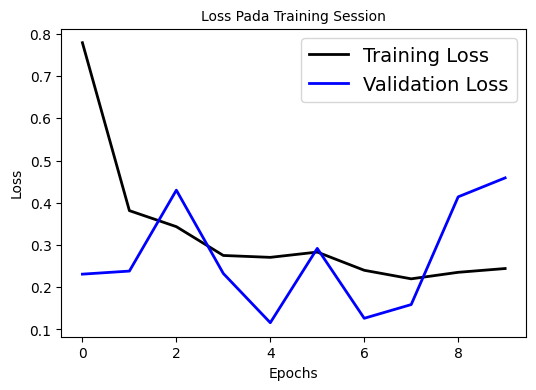

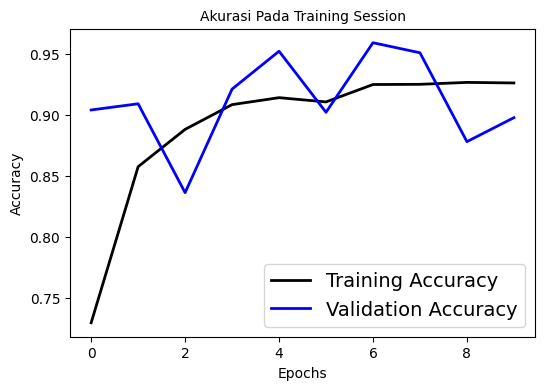

In [21]:
import matplotlib.pyplot as plt

# Plotting the loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'blue', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Pada Training Session', fontsize=10)

# Plotting the accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Akurasi Pada Training Session',fontsize=10)

In [14]:
model_efficientnetb0.evaluate(x_test,y_test)

50/50 [==============================] - 9s 177ms/step - loss: 0.1613 - accuracy: 0.9422


[0.16134929656982422, 0.9422222375869751]

In [15]:
model_efficientnetb0.save('efficientnetb0augmented.h5')

c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
prediction = model_efficientnetb0.predict(x_test)
prediction

50/50 [==============================] - 11s 194ms/step


array([[2.9154288e-09, 5.9830450e-06, 8.8160999e-07, 9.9996841e-01,
        2.4733772e-05, 8.7340633e-09],
       [1.0928697e-09, 1.9000403e-05, 1.2802379e-03, 9.9860436e-01,
        1.2750252e-10, 9.6476186e-05],
       [2.8369533e-12, 3.5147085e-08, 9.9664944e-01, 3.3504919e-03,
        2.4408653e-10, 2.7220484e-09],
       ...,
       [4.9131899e-10, 1.0000000e+00, 1.9082189e-10, 6.2966811e-12,
        2.0127563e-11, 8.1833255e-11],
       [1.2320162e-10, 2.6893856e-06, 9.9721611e-01, 2.7812112e-03,
        1.2107296e-09, 2.3236066e-09],
       [1.4375731e-06, 1.0019131e-12, 3.9877394e-12, 5.2826953e-12,
        3.6827565e-08, 9.9999857e-01]], dtype=float32)

In [17]:
jenis_kanker = ["Adenocarcinoma","Kanker Ganas","Kanker Jinak", "Sehat", "Sel Besar Karsinoma", "Sel Besar Skuamous"]
banyak_kesalahan = 0
for i in range(len(prediction)):
    if jenis_kanker[np.argmax(prediction[i])] != jenis_kanker[np.argmax(y_test[i])]:
        banyak_kesalahan += 1
        print("data ke :",  i+1)
        print("Prediction : " + jenis_kanker[np.argmax(prediction[i])])
        print("Kunci Jawaban: ",jenis_kanker[np.argmax(y_test[i])])
        print()
print(banyak_kesalahan)

data ke : 32
Prediction : Kanker Jinak
Kunci Jawaban:  Sehat

data ke : 57
Prediction : Kanker Jinak
Kunci Jawaban:  Sehat

data ke : 66
Prediction : Kanker Jinak
Kunci Jawaban:  Sehat

data ke : 95
Prediction : Kanker Jinak
Kunci Jawaban:  Sehat

data ke : 99
Prediction : Sel Besar Skuamous
Kunci Jawaban:  Sel Besar Karsinoma

data ke : 109
Prediction : Kanker Jinak
Kunci Jawaban:  Sehat

data ke : 156
Prediction : Kanker Jinak
Kunci Jawaban:  Sehat

data ke : 178
Prediction : Kanker Jinak
Kunci Jawaban:  Sehat

data ke : 181
Prediction : Kanker Jinak
Kunci Jawaban:  Sehat

data ke : 195
Prediction : Adenocarcinoma
Kunci Jawaban:  Sel Besar Karsinoma

data ke : 220
Prediction : Sel Besar Skuamous
Kunci Jawaban:  Adenocarcinoma

data ke : 236
Prediction : Kanker Jinak
Kunci Jawaban:  Sehat

data ke : 278
Prediction : Sel Besar Skuamous
Kunci Jawaban:  Sel Besar Karsinoma

data ke : 282
Prediction : Kanker Jinak
Kunci Jawaban:  Sehat

data ke : 300
Prediction : Adenocarcinoma
Kunci Jawa

In [18]:
print(len(y_test))
banyak_kesalahan

1575


91

In [19]:
akurasi_training = model_efficientnetb0.evaluate(x_train,y_train)[1]
akurasi_testing = model_efficientnetb0.evaluate(x_test,y_test)[1]

 28/197 [===>..........................] - ETA: 33s - loss: 0.1743 - accuracy: 0.9520

KeyboardInterrupt: 

In [21]:
print("Akurasi training session :",akurasi_training)
print("Akurasi testing session :",akurasi_testing)

Akurasi training session : 0.8011435866355896
Akurasi testing session : 0.7682539820671082
